# Graph - Representations

---

## Adjacency List

* Represent graph as a dictionary or list mapping each node to a list of its neighbors.
* Traversing neighbors is fast because only the connected nodes are stored.
* Good for *sparse* graphs: contrast with adjacency matrices which store $n^2$ entries, which wastes memory on absent edges.

In [1]:
from abc import ABC, abstractmethod
from collections import defaultdict
from dataclasses import dataclass
from typing import Dict, Generic, List, TypeVar

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
T = TypeVar("T")


@dataclass
class GraphNode(Generic[T]):
    value: T

    def __hash__(self) -> int:
        return hash(self.value)

    def __eq__(self, other: object) -> bool:
        if not isinstance(other, GraphNode):
            return NotImplemented
        return self.value == other.value


class Graph(Generic[T], ABC):
    @abstractmethod
    def to_networkx(self) -> nx.Graph:
        pass

    def visualise(self) -> None:
        g = self.to_networkx()
        pos = nx.spring_layout(g)

        plt.figure(figsize=(6, 4))
        plt.title("Graph Visualization", fontsize=12)

        nx.draw(
            g,
            pos,
            with_labels=True,
            node_color="lightblue",
            edge_color="gray",
            node_size=500,
            font_size=10,
            arrows=True,
        )
        plt.tight_layout()
        plt.show()

In [3]:
class AdjacencyListDirectedGraph(Graph[T]):
    def __init__(self, adj_list: Dict[GraphNode[T], List[GraphNode[T]]]) -> None:
        self.adjacency_list = defaultdict(list, adj_list)

    def to_networkx(self) -> nx.DiGraph:
        g = nx.DiGraph()

        # Add all nodes first, including those without edges
        for node in self.adjacency_list.keys():
            g.add_node(node.value)

        # Then add edges
        for node, edges in self.adjacency_list.items():
            for edge in edges:
                g.add_edge(node.value, edge.value)

        return g

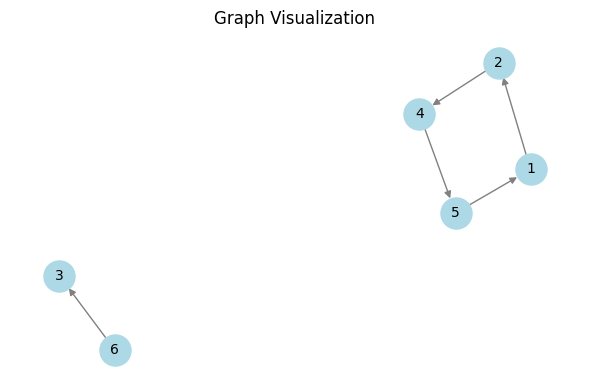

In [4]:
if __name__ == "__main__":
    adj_list_graph = AdjacencyListDirectedGraph(
        {
            GraphNode(1): [GraphNode(2)],
            GraphNode(2): [GraphNode(4)],
            GraphNode(3): [],
            GraphNode(4): [GraphNode(5)],
            GraphNode(5): [GraphNode(1)],
            GraphNode(6): [GraphNode(3)],
        }
    )
    adj_list_graph.visualise()

## Adjacency Matrix

A 2D array where $M[i][j]$ indicates presence (and sometimes weight) of edge from $i$ to $j$.

* Easy to check if edge exists but expensive in space for large sparse graphs.
* Traversing neighbours may not be fast as it requires checking the entire row.

In [5]:
class AdjacencyMatrixDirectedGraph(Graph[T]):
    def __init__(self, nodes: List[GraphNode[T]], matrix: List[List[int]]):
        self.nodes = nodes
        self.adj_matrix = matrix

    def to_networkx(self) -> nx.DiGraph:
        g = nx.DiGraph()
        n = len(self.nodes)

        # Add all nodes first
        for node in self.nodes:
            g.add_node(node.value)

        # Add edges from adjacency matrix
        for i in range(n):
            for j in range(n):
                if self.adj_matrix[i][j] != 0:
                    g.add_edge(self.nodes[i].value, self.nodes[j].value)

        return g

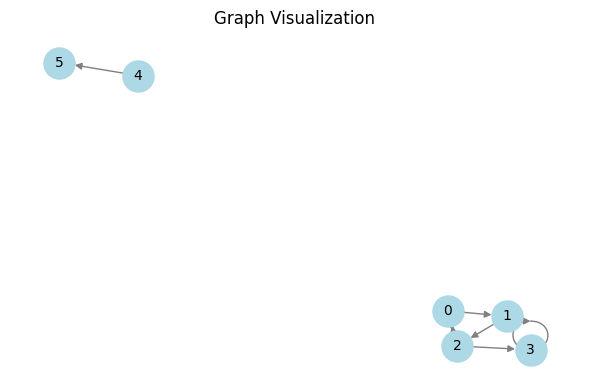

In [6]:
if __name__ == "__main__":
    nodes = [GraphNode(i) for i in range(6)]
    matrix = [
        [0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
    ]

    adj_matrix_graph = AdjacencyMatrixDirectedGraph(nodes, matrix)
    adj_matrix_graph.visualise()